### **0. Install Mujoco Physics Engine on the Kernel**

In [1]:
!apt-get install -y \
   libgl1-mesa-dev \
   libgl1-mesa-glx \
   libglew-dev \
   libosmesa6-dev \
   software-properties-common

!apt-get install -y patchelf 

!pip install free-mujoco-py




software-properties-common is already the newest version (0.99.22.9).
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
The following additional packages will be installed:
  libegl-dev libgl-dev libgles-dev libgles1 libglu1-mesa libglu1-mesa-dev libglvnd-core-dev
  libglvnd-dev libglx-dev libopengl-dev libosmesa6
The following NEW packages will be installed:
  libegl-dev libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglew-dev libglu1-mesa
  libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libopengl-dev libosmesa6
  libosmesa6-dev
0 upgraded, 14 newly installed, 0 to remove and 62 not upgraded.
Need to get 4,008 kB of archives.
After this operation, 19.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libegl-dev amd64 1.4

In [2]:
import os
#Include this at the top of your colab code
if not os.path.exists('.mujoco_setup_complete'):
    # Get the prereqs
    !apt-get -qq update
    !apt-get -qq install -y libosmesa6-dev libgl1-mesa-glx libglfw3 libgl1-mesa-dev libglew-dev patchelf
    # Get Mujoco
    !mkdir ~/.mujoco
    !wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz -O mujoco.tar.gz
    !tar -zxf mujoco.tar.gz -C "$HOME/.mujoco"
    !rm mujoco.tar.gz
    # Add it to the actively loaded path and the bashrc path (these only do so much)
    !echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$HOME/.mujoco/mujoco210/bin' >> ~/.bashrc 
    !echo 'export LD_PRELOAD=$LD_PRELOAD:/usr/lib/x86_64-linux-gnu/libGLEW.so' >> ~/.bashrc 
    # THE ANNOYING ONE, FORCE IT INTO LDCONFIG SO WE ACTUALLY GET ACCESS TO IT THIS SESSION
    !echo "/root/.mujoco/mujoco210/bin" > /etc/ld.so.conf.d/mujoco_ld_lib_path.conf
    !ldconfig
    # Install Mujoco-py
    !pip3 install -U 'mujoco-py<2.2,>=2.1'
    # run once
    !touch .mujoco_setup_complete

try:
    if _mujoco_run_once:
        pass
except NameError:
    _mujoco_run_once = False
if not _mujoco_run_once:
  # Add it to the actively loaded path and the bashrc path (these only do so much)
    try:
        os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/root/.mujoco/mujoco210/bin'
    except KeyError:
        os.environ['LD_LIBRARY_PATH']='/root/.mujoco/mujoco210/bin'
    try:
        os.environ['LD_PRELOAD']=os.environ['LD_PRELOAD'] + ':/usr/lib/x86_64-linux-gnu/libGLEW.so'
    except KeyError:
        os.environ['LD_PRELOAD']='/usr/lib/x86_64-linux-gnu/libGLEW.so'
    # presetup so we don't see output on first env initialization
    import mujoco_py
    _mujoco_run_once = True

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libglfw3:amd64.
(Reading database ... 127540 files and directories currently installed.)
Preparing to unpack .../libglfw3_3.3.6-1_amd64.deb ...
Unpacking libglfw3:amd64 (3.3.6-1) ...
Setting up libglfw3:amd64 (3.3.6-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/lo

In [3]:
# intall d4rl github repo
!pip install git+https://github.com/Farama-Foundation/d4rl@master#egg=d4rl

  Cloning https://github.com/Farama-Foundation/d4rl (to revision master) to /tmp/pip-install-buhkkfxm/d4rl_66895ebb661a4ac5b1fa57f9f1f079d0
  Running command git clone --filter=blob:none --quiet https://github.com/Farama-Foundation/d4rl /tmp/pip-install-buhkkfxm/d4rl_66895ebb661a4ac5b1fa57f9f1f079d0
  Resolved https://github.com/Farama-Foundation/d4rl to commit 89141a689b0353b0dac3da5cba60da4b1b16254d
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/aravindr93/mjrl (to revision master) to /tmp/pip-install-buhkkfxm/mjrl_84e4eff5507d4e7cb9deae38faab630c
  Running command git clone --filter=blob:none --quiet https://github.com/aravindr93/mjrl /tmp/pip-install-buhkkfxm/mjrl_84e4eff5507d4e7cb9deae38faab630c
  Resolved https://github.com/aravindr93/mjrl to commit 3871d93763d3b49c4741e6daeaebbc605fe140dc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/626.2 kB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Get

In [4]:
!pip install gymnasium
!pip install minari
!pip install carla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.9/31.9 MB 61.1 MB/s eta 0:00:00


In [5]:
# All necessary imports
import os
import gym
import d4rl # Import required to register environments, you may need to also import the submodule
import numpy as np 
import torch 
from torch.utils.data import Dataset 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.distributions as dist
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
import collections
from torch.cuda.amp import autocast
import torch.distributions as dist
import json

These new versions include large bug fixes, new versions of Python, and are where all new development will continue. Please upgrade these libraries as soon as you're able to do so.
If you'd like to read more about the story behind this switch, please check out ]8;;https://farama.org/Announcing-Minari\this blog post]8;;\.
No module named 'flow'
No module named 'dotmap'
/usr/local/lib/python3.10/dist-packages/pybullet_envs/env_bases.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/u

In [6]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
PRETRAINED_DYNAMICS_MODEL = [
    "/kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_1_final.pth",
    "/kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_2_final.pth",
    "/kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_3_final.pth",
]

PRETRAINED_BEHAVIOR_MODEL = [
    "/kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_1_final.pth",
    "/kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_2_final.pth",
    "/kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_3_final.pth",
]

In [9]:
OUTPUT_DIR = "/kaggle/working/"
DYNAMICS_MODEL = os.path.join(OUTPUT_DIR,"dynamics_model")
BEHAVIOR_MODEL = os.path.join(OUTPUT_DIR,"behavior_model")
Q_NETWORK_MODEL = os.path.join(OUTPUT_DIR,"q_network")
RESULTS = os.path.join(OUTPUT_DIR, "results")

os.makedirs(DYNAMICS_MODEL, exist_ok=True)
os.makedirs(BEHAVIOR_MODEL, exist_ok=True)
os.makedirs(Q_NETWORK_MODEL, exist_ok=True)
os.makedirs(RESULTS, exist_ok = True)

print(f"Directories created:\n- {DYNAMICS_MODEL}\n- {BEHAVIOR_MODEL}\n- {Q_NETWORK_MODEL}-\n {RESULTS}")

Directories created:
- /kaggle/working/dynamics_model
- /kaggle/working/behavior_model
- /kaggle/working/q_network-
 /kaggle/working/results


### 1. Dataset

In [10]:
class Environment(Dataset):
    def __init__(self, env_name, normalization_states=False, normalization_rewards=False, subset_size=None):
        self.env = gym.make(env_name)
        self.dataset = self.env.get_dataset()  # Load the D4RL dataset

        # Extract data from the D4RL dataset
        self.observations = torch.tensor(self.dataset['observations'], dtype=torch.float32)
        self.actions = torch.tensor(self.dataset['actions'], dtype=torch.float32)
        self.rewards = torch.tensor(self.dataset['rewards'], dtype=torch.float32)
        self.next_states = torch.tensor(self.dataset['next_observations'], dtype=torch.float32)
        self.dones = torch.tensor(self.dataset['terminals'], dtype=torch.float32)

        # Subset the dataset if subset_size is provided
        if subset_size is not None:
            self.observations = self.observations[:subset_size]
            self.actions = self.actions[:subset_size]
            self.rewards = self.rewards[:subset_size]
            self.next_states = self.next_states[:subset_size]
            self.dones = self.dones[:subset_size]

        # Normalize data if required
        if normalization_states:
            self.normalize_states()
        if normalization_rewards:
            self.normalize_rewards()

        # Initialize for episodic simulation
        self.num_steps = len(self.observations)
        self.current_idx = 0 

    def normalize_states(self):
        self.shift = -self.observations.mean(dim=0)
        self.scale = 1.0 / (self.observations.std(dim=0) + 1e-3)

        # Normalize observations and next_states
        self.observations = (self.observations + self.shift) * self.scale
        self.next_states = (self.next_states + self.shift) * self.scale

    def normalize_rewards(self):
        self.r_max = self.rewards.max()
        self.r_min = self.rewards.min()
        self.rewards = (self.rewards - self.r_min) / (self.r_max - self.r_min)

    def __len__(self):
        return len(self.observations)

    def __getitem__(self, idx):
        return {
            'observation': self.observations[idx],
            'action': self.actions[idx],
            'reward': self.rewards[idx],
            'next_state': self.next_states[idx],
            'done': self.dones[idx]
        }

    def reset(self):
        self.current_idx = 0
        return self.observations[self.current_idx]
    
    def step(self, action):
        # Taking a step in the environment 
        #print("self.current_idx", self.current_idx)
        if self.current_idx >= self.num_steps:
            raise IndexError("Dataset Exhausted. Call reset() to restart")

        observation = self.observations[self.current_idx]
        reward = self.rewards[self.current_idx]
        next_state = self.next_states[self.current_idx]
        done = self.dones[self.current_idx]

        self.current_idx += 1  # Move to the next step
        return next_state, reward, done


In [11]:
# Initialize dataset
env_dataset = Environment(env_name="hopper-medium-v2", normalization_states=False, normalization_rewards=False)

# Extract data
states = env_dataset.observations
actions = env_dataset.actions
next_states = env_dataset.next_states
rewards = env_dataset.rewards

# Optionally, inspect shapes
print("States Shape:", states.shape)        # (N, state_dim)
print("Actions Shape:", actions.shape)      # (N, action_dim)
print("Next States Shape:", next_states.shape)  # (N, state_dim)
print("Rewards Shape:", rewards.shape)      # (N,)

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████| 21/21 [00:01<00:00, 15.72it/s]

States Shape: torch.Size([1000000, 11])
Actions Shape: torch.Size([1000000, 3])
Next States Shape: torch.Size([1000000, 11])
Rewards Shape: torch.Size([1000000])


In [12]:
states, actions, next_states, rewards = states.to(device), actions.to(device), next_states.to(device), rewards.to(device)

### 2. Autoregressive Dynamics Model

In [13]:
LOG_STD_MAX = 2
LOG_STD_MIN = -20

In [14]:
class ADM(nn.Module):
    """Unified ADM network: Supports both behavior policy and dynamics model"""
    def __init__(self, output_dim, input_dim, fc_layer_params=(), out_reranking=None, latent_dim=None):
        super().__init__()
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.out_rank = np.arange(output_dim) if out_reranking is None else out_reranking
        latent_dim = latent_dim or output_dim * 2
        self.shared_layer, self._layers_list = self._initialize_layers(fc_layer_params, latent_dim)

    def _initialize_layers(self, fc_layer_params, latent_dim):
        shared_layer, layers_list = nn.ModuleList(), nn.ModuleList()
        if isinstance(fc_layer_params[0], (list, tuple)):
            shared_params, indiv_params = fc_layer_params
            # Initialize shared layers
            for i, n in enumerate(shared_params):
                in_features = self.input_dim if i == 0 else shared_params[i - 1]
                shared_layer.append(nn.Linear(in_features, n))
            shared_layer.append(nn.Linear(shared_params[-1], latent_dim))
        else:
            indiv_params = fc_layer_params
    
        # Initialize individual output layers
        for _ in range(self.output_dim):
            layers = nn.ModuleList()
            for i, n in enumerate(indiv_params):
                # Adjust input size for concatenated tensor (latent_dim + mode.size)
                in_features = latent_dim + _ if i == 0 else indiv_params[i - 1]
                layers.append(nn.Linear(in_features, n))
            layers.append(nn.Linear(indiv_params[-1], 2))  # Mean and std
            layers_list.append(layers)
    
        return shared_layer, layers_list

    def _forward_layers(self, x, layers):
        for layer in layers:
            x = torch.relu(layer(x))
        return x

    def _get_outputs(self, inputs, layers):
        h = self._forward_layers(inputs, layers)
        mean, log_std = torch.chunk(h, 2, dim=-1)
        log_std = torch.clamp(log_std, LOG_STD_MIN, LOG_STD_MAX)
        std = torch.exp(log_std)
        distribution = dist.Normal(mean, std)
        return distribution, mean

    def _update_tensor(self, a, b, index):
        # If `b` is scalar, unsqueeze to make it (1, 1)
        if b.dim() == 0:  # If `b` is scalar, make it (1, 1)
            b = b.unsqueeze(0).unsqueeze(1)  # Reshape to (1, 1)
        elif b.dim() == 1:  # If `b` is 1D, add another dimension
            b = b.unsqueeze(1)  # Reshape to (batch_size, 1)
    
        # Ensure `b` has the same batch size as `a`
        if b.size(0) != a.size(0):
            raise ValueError(f"Mismatch in batch size: a has {a.size(0)} rows, but b has {b.size(0)} rows.")
    
        # Ensure `b` has the correct dimensions (2D tensor with size [batch_size, 1])
        if b.dim() != 2 or b.size(1) != 1:
            raise ValueError(f"Tensor `b` must have 2 dimensions and size (batch_size, 1). Got {b.shape}.")
    
        # Split `a` into left and right parts
        left = a[:, :index]
        right = a[:, index + 1:]
    
        # Concatenate left, b, and right along dimension 1
        return torch.cat([left, b, right], dim=1)


    def forward(self, inputs):
        h = inputs
        if self.shared_layer:
            for layer in self.shared_layer:
                h = torch.relu(layer(h))
    
        batch_size = inputs.size(0)
        out_mean = torch.zeros(batch_size, self.output_dim, device=inputs.device)
        outs_sample = torch.zeros(batch_size, self.output_dim, device=inputs.device)
        log_pi_outs = torch.zeros(batch_size, self.output_dim, device=inputs.device)
        outs_dist = [None] * self.output_dim
    
        for i, index in enumerate(self.out_rank):
            dist, mode = self._get_outputs(h, self._layers_list[i])
    
            # Ensure mode has the shape [batch_size, 1] (2D tensor)
            if mode.dim() == 3:  # If mode has shape [batch_size, 1, 1], squeeze the extra dimension
                mode = mode.squeeze(2)  # This will make it [batch_size, 1]
            elif mode.dim() == 1:  # If mode is [batch_size], we need to add an extra dimension
                mode = mode.unsqueeze(1)  # This will make it [batch_size, 1]
    
            # Now, h is [batch_size, feature_size] and mode is [batch_size, 1]
            #print(f"h.shape: {h.shape}")  # Debug print
            #print(f"mode.shape: {mode.shape}")  # Debug print
    
            # Concatenate h and mode
            h = torch.cat([h, mode], dim=-1)  # This should now work
    
            sample = dist.rsample()
            log_prob = dist.log_prob(sample)
    
            out_mean = self._update_tensor(out_mean, mode, index)
            outs_sample = self._update_tensor(outs_sample, sample, index)
            log_pi_outs = self._update_tensor(log_pi_outs, log_prob, index)
            outs_dist[index] = dist
    
        return out_mean, outs_sample, log_pi_outs, outs_dist


    def predict_behavior(self, state):
        """Predicts behavior policy given the state."""
        return self.forward(state)

    def predict_dynamics(self, state, action):
        """Predicts next state and reward given state and action."""
        inputs = torch.cat([state, action], dim=-1)
        return self.forward(inputs)

In [15]:
class ADMEnsemble:
    """Ensemble of K ADM models with randomly permuted output orderings."""
    def __init__(self, num_models, output_dim, input_dim, fc_layer_params=(), latent_dim=None):
        self.num_models = num_models
        self.models = []
        self.output_orderings = []

        for _ in range(num_models):
            # Generate a random permutation of output dimensions
            ordering = np.random.permutation(output_dim)
            self.output_orderings.append(ordering)

            # Initialize a new ADM model with the permuted ordering
            model = ADM(
                output_dim=output_dim,
                input_dim=input_dim,
                fc_layer_params=fc_layer_params,
                out_reranking=ordering,
                latent_dim=latent_dim
            )
            self.models.append(model)

    def predict_behavior(self, state):
        """Predicts behavior policy using all ensemble members."""
        predictions = [model.predict_behavior(state) for model in self.models]
        return predictions

    def predict_dynamics(self, state, action):
        """Predicts dynamics using all ensemble members."""
        predictions = [model.predict_dynamics(state, action) for model in self.models]
        return predictions

    def aggregate_predictions(self, predictions):
        """Aggregates predictions from the ensemble."""
        # Extract `out_mean` from each prediction
        out_means = [pred[0] for pred in predictions]  # Select the first element of each tuple
        aggregated = torch.mean(torch.stack(out_means), dim=0)  # Aggregate over ensemble members
        return aggregated

- Extracting dimensionalities

In [16]:
state_dim = states.shape[1]
action_dim = actions.shape[1]
next_state_dim = next_states.shape[1]
reward_dim = 1

- Define ADM Ensemble Dynamics

In [17]:
# Initialize ADMEnsemble for dynamics
K1 = 3  # Number of dynamics models in the ensemble
dynamics_ensemble = ADMEnsemble(
    num_models=K1,
    output_dim=next_state_dim + reward_dim,
    input_dim=state_dim + action_dim,
    fc_layer_params=([500], [200,100])
)

- Define ADM Ensemble Behavior 

In [18]:
# Initialize ADMEnsemble for behavior
K2 = 3 # Number of behavior models in the ensemble
behavior_ensemble = ADMEnsemble(
    num_models=K2,
    output_dim=action_dim,
    input_dim=state_dim,
    fc_layer_params=([500],[200,100])
)

- Optimizers

In [19]:
# Optimizers for ensemble models
dynamics_optimizers = [torch.optim.Adam(model.parameters(), lr=1e-3) for model in dynamics_ensemble.models]
behavior_optimizers = [torch.optim.Adam(model.parameters(), lr=1e-3) for model in behavior_ensemble.models]

- Loading Pretrained Ensemble 

In [20]:
# Load pretrained dynamics and behavior models
def load_pretrained_ensemble(ensemble, pretrained_paths, optimizers, device):
    for i, (model, optimizer) in enumerate(zip(ensemble.models, optimizers)):
        model.to(device)
        if pretrained_paths[i] is not None:  # Check if a path is provided
            checkpoint = torch.load(pretrained_paths[i], map_location=device)
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            print(f"Loaded pretrained model {i + 1} from {pretrained_paths[i]}")
        else:
            print(f"No pretrained model provided for model {i + 1}. Training from scratch.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
load_pretrained_ensemble(dynamics_ensemble, PRETRAINED_DYNAMICS_MODEL, dynamics_optimizers, device)
load_pretrained_ensemble(behavior_ensemble, PRETRAINED_BEHAVIOR_MODEL, behavior_optimizers, device)

<ipython-input-20-5ca5807f7522>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretrained_paths[i], map_location=device)


Loaded pretrained model 1 from /kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_1_final.pth
Loaded pretrained model 2 from /kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_2_final.pth
Loaded pretrained model 3 from /kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_3_final.pth
Loaded pretrained model 1 from /kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_1_final.pth
Loaded pretrained model 2 from /kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_2_final.pth
Loaded pretrained model 3 from /kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_3_final.pth


- Initializing Ensemble with Pretrained Models

In [22]:
def initialize_ensemble_with_pretrained(ensemble, pretrained_paths, optimizers, device):
    for i, (model, optimizer, pretrained_path) in enumerate(zip(ensemble.models, optimizers, pretrained_paths)):
        model.to(device)
        if pretrained_path is not None:  # If pretrained path is provided
            checkpoint = torch.load(pretrained_path, map_location=device)  # Load the checkpoint
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            print(f"Pretrained model {i + 1} loaded from {pretrained_path}.")
        else:
            print(f"No pretrained model provided for model {i + 1}. Training from scratch.")


In [23]:
initialize_ensemble_with_pretrained(dynamics_ensemble, PRETRAINED_DYNAMICS_MODEL, dynamics_optimizers, device)
initialize_ensemble_with_pretrained(behavior_ensemble, PRETRAINED_BEHAVIOR_MODEL, behavior_optimizers, device)

<ipython-input-22-2ce07f5479cc>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretrained_path, map_location=device)  # Load the checkpoint


Pretrained model 1 loaded from /kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_1_final.pth.
Pretrained model 2 loaded from /kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_2_final.pth.
Pretrained model 3 loaded from /kaggle/input/hopper-medium-pretrain/dynamics_model/dynamics_model_3_final.pth.
Pretrained model 1 loaded from /kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_1_final.pth.
Pretrained model 2 loaded from /kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_2_final.pth.
Pretrained model 3 loaded from /kaggle/input/hopper-medium-pretrain/behavior_model/behavior_model_3_final.pth.


- Dataloaders

In [24]:
# DataLoader
batch_size = 256
num_epochs = 500

In [25]:
subset_size = 100000 # Use 1000 samples instead of 1M
dataset_dynamics = torch.utils.data.TensorDataset(
    states[:subset_size], actions[:subset_size], next_states[:subset_size], rewards[:subset_size]
)
dataset_behavior = torch.utils.data.TensorDataset(
    states[:subset_size], actions[:subset_size]
) 

In [26]:
''' 
#subset_size = 1000  # Use 1000 samples instead of 1M
dataset_dynamics = torch.utils.data.TensorDataset(states, actions, next_states, rewards)
dataset_behavior = torch.utils.data.TensorDataset(states, actions)
''' 

' \n#subset_size = 1000  # Use 1000 samples instead of 1M\ndataset_dynamics = torch.utils.data.TensorDataset(states, actions, next_states, rewards)\ndataset_behavior = torch.utils.data.TensorDataset(states, actions)\n'

In [27]:
dataloader_dynamics = torch.utils.data.DataLoader(dataset_dynamics, batch_size=batch_size, shuffle=True)
dataloader_behavior = torch.utils.data.DataLoader(dataset_behavior, batch_size=batch_size, shuffle=True)

- Training Loop

In [28]:
# Ensure all models are on the correct device before training
for model in dynamics_ensemble.models:
    model.to(device)
for model in behavior_ensemble.models:
    model.to(device)

In [29]:
for epoch in range(num_epochs):
    # Train Dynamics Ensemble
    dynamics_losses = [0.0 for _ in range(K1)]
    for state, action, next_state, reward in dataloader_dynamics:
        state = state.to(device)
        action = action.to(device)
        next_state = next_state.to(device)
        inputs = torch.cat([state, action], dim=-1)
        targets = torch.cat([next_state, reward.unsqueeze(-1)], dim=-1)

        for i, (model, optimizer) in enumerate(zip(dynamics_ensemble.models, dynamics_optimizers)):
            model.to(device)
            optimizer.zero_grad()
            _, outs_sample, _, _ = model(inputs)
            next_state = outs_sample[:, :state_dim]
            reward = outs_sample[:, state_dim:]

            # Compute log-likelihood loss
            loss = torch.nn.functional.mse_loss(outs_sample, targets)
            loss.backward()
            optimizer.step()

            dynamics_losses[i] += loss.item()

    # Train Behavior Ensemble
    behavior_losses = [0.0 for _ in range(K2)]
    for state, action in dataloader_behavior:
        state = state.to(device)
        action = action.to(device)
        inputs = state
        targets = action

        for i, (model, optimizer) in enumerate(zip(behavior_ensemble.models, behavior_optimizers)):
            optimizer.zero_grad()
            _, outs_sample, _, _ = model(inputs)

            # Compute log-likelihood loss
            loss = torch.nn.functional.mse_loss(outs_sample, targets)
            loss.backward()
            optimizer.step()

            behavior_losses[i] += loss.item()

    # Print epoch losses
    print(f"Epoch {epoch + 1}/{num_epochs}")
    for i, loss in enumerate(dynamics_losses):
        print(f"  Dynamics Model {i + 1} Loss: {loss:.4f}")
    for i, loss in enumerate(behavior_losses):
        print(f"  Behavior Model {i + 1} Loss: {loss:.4f}")

Epoch 1/500
  Dynamics Model 1 Loss: 1236.0588
  Dynamics Model 2 Loss: 1793.1914
  Dynamics Model 3 Loss: 1725.1455
  Behavior Model 1 Loss: 486.5755
  Behavior Model 2 Loss: 503.2867
  Behavior Model 3 Loss: 534.9189
Epoch 2/500
  Dynamics Model 1 Loss: 1167.2598
  Dynamics Model 2 Loss: 1737.3824
  Dynamics Model 3 Loss: 1688.2531
  Behavior Model 1 Loss: 488.4313
  Behavior Model 2 Loss: 496.5690
  Behavior Model 3 Loss: 524.3356
Epoch 3/500
  Dynamics Model 1 Loss: 1163.8378
  Dynamics Model 2 Loss: 1741.9491
  Dynamics Model 3 Loss: 1685.1796
  Behavior Model 1 Loss: 488.6097
  Behavior Model 2 Loss: 491.1754
  Behavior Model 3 Loss: 523.1706
Epoch 4/500
  Dynamics Model 1 Loss: 1165.4749
  Dynamics Model 2 Loss: 1740.1859
  Dynamics Model 3 Loss: 1686.5634
  Behavior Model 1 Loss: 487.8992
  Behavior Model 2 Loss: 490.5031
  Behavior Model 3 Loss: 519.8545
Epoch 5/500
  Dynamics Model 1 Loss: 1162.8943
  Dynamics Model 2 Loss: 1736.2793
  Dynamics Model 3 Loss: 1685.3529
  Behav

In [30]:
for i, (model, optimizer) in enumerate(zip(dynamics_ensemble.models, dynamics_optimizers)):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, os.path.join(DYNAMICS_MODEL, f"dynamics_model_{i + 1}_final.pth"))

for i, (model, optimizer) in enumerate(zip(behavior_ensemble.models, behavior_optimizers)):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, os.path.join(BEHAVIOR_MODEL, f"behavior_model_{i + 1}_final.pth"))

print("All models saved successfully.")

All models saved successfully.


### 3. Value Function Evaluation

- Q-network definition

In [31]:
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dims):
        super(QNetwork, self).__init__()
        input_dim = state_dim + action_dim  # Combine state and action dimensions
        layers = []
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, 1))  # Single output for Q-value
        self.model = nn.Sequential(*layers)

    def forward(self, state, action):
        x = torch.cat([state, action], dim=-1)  # Concatenate state and action
        return self.model(x)

In [32]:
num_models = 3
num_q_networks = 3

In [33]:
# Create Q-network ensemble
hidden_dims = [500, 200, 100]  # Example hidden layers
q_networks = [QNetwork(state_dim, action_dim, hidden_dims) for _ in range(3)]
target_q_networks = [QNetwork(state_dim, action_dim, hidden_dims) for _ in range(3)]

# Optimizers for Q-networks
q_optimizers = [torch.optim.Adam(q_net.parameters(), lr=1e-3) for q_net in q_networks]

- FQE training loop that iteratively updates Q-value so to minimize Bellman Error

In [34]:
def train_q_value_network_ensemble(q_networks, target_q_networks, behavior_policies, dataloader, optimizers, gamma=0.99, num_epochs=40, device="cuda"):
    # Move models to the correct device
    for q_network in q_networks:
        q_network.to(device)
    for target_q_network in target_q_networks:
        target_q_network.to(device)
    for behavior_policy in behavior_policies:
        behavior_policy.to(device)

    for epoch in range(num_epochs):
        epoch_losses = [0.0 for _ in range(len(q_networks))]
        for batch_idx, (state, action, next_state, reward) in enumerate(dataloader):
            # Move data to the device
            state = state.to(device)
            action = action.to(device)
            next_state = next_state.to(device)
            reward = reward.to(device)

            for i, (q_network, target_q_network, behavior_policy, optimizer) in enumerate(zip(q_networks, target_q_networks, behavior_policies, optimizers)):
                optimizer.zero_grad()

                # Compute current Q-value
                current_q_value = q_network(state, action)

                with torch.no_grad():
                    # Predict next action using the behavior policy
                    _, next_action, _, _ = behavior_policy.predict_behavior(next_state)
    
                    # Compute target Q-value
                    target_q_value = reward.unsqueeze(-1) + gamma * target_q_network(next_state, next_action)

                # Compute loss
                loss = torch.nn.functional.mse_loss(current_q_value, target_q_value)

                # Backpropagation
                loss.backward()
                optimizer.step()

                epoch_losses[i] += loss.item()

        # Print losses
        for i, loss in enumerate(epoch_losses):
            print(f"Epoch {epoch + 1}/{num_epochs}, Q-Network {i + 1} Loss: {loss:.4f}")


    # Save Q-networks and optimizers at the end of training
    for i, (q_network, optimizer) in enumerate(zip(q_networks, optimizers)):
        q_net_output = os.path.join(Q_NETWORK_MODEL, f"q_network_{i + 1}_final.pth")
        torch.save({
            'model_state_dict': q_network.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, q_net_output)

    print(f"Q-networks saved successfully in directory: {Q_NETWORK_MODEL}")

- Compute the value function by sampling actions from the behavior policy

In [35]:
def evaluate_value_function_ensemble(q_networks, state, behavior_policies, num_samples=10):
    """
    Evaluates the value function V_b(s) using an ensemble of Q-networks and behavior policies.

    Args:
        q_networks: List of Q-value networks.
        state: State tensor for evaluation.
        behavior_policies: List of behavior policy models.
        num_samples: Number of actions to sample from each behavior policy.

    Returns:
        The average value function V_b(s) over all ensembles.
    """
    total_value = 0.0
    for q_network, behavior_policy in zip(q_networks, behavior_policies):
        for _ in range(num_samples):
            _, action, _, _ = behavior_policy.predict_behavior(state)
            total_value += q_network(state, action).item()

    return total_value / (len(q_networks) * num_samples)  # Average over all models and samples

- Max-Q operation

In [36]:
def perform_max_q_operation(q_networks, behavior_policies, state, num_samples=10):
    """
    Performs the max-Q operation using an ensemble of Q-networks and behavior policies.

    Args:
        q_networks: List of Q-value networks.
        behavior_policies: List of behavior policy models.
        state: State tensor for evaluation.
        num_samples: Number of actions to sample from each behavior policy.

    Returns:
        Action with the maximum Q-value across the ensemble.
    """
    max_q_value = float("-inf")
    best_action = None

    for q_network, behavior_policy in zip(q_networks, behavior_policies):
        for _ in range(num_samples):
            _, action, _, _ = behavior_policy.predict_behavior(state)
            q_value = q_network(state, action).item()

            if q_value > max_q_value:
                max_q_value = q_value
                best_action = action

    return best_action

- Define behavior policies

In [37]:
behavior_policies = behavior_ensemble.models

- Train QNetwork

In [38]:
train_q_value_network_ensemble(
    q_networks=q_networks,
    target_q_networks=target_q_networks,
    behavior_policies=behavior_policies,  # List of behavior policy models
    dataloader=dataloader_dynamics,
    optimizers=q_optimizers,
    gamma=0.99,
    num_epochs=40
)

Epoch 1/40, Q-Network 1 Loss: 57.8629
Epoch 1/40, Q-Network 2 Loss: 53.4419
Epoch 1/40, Q-Network 3 Loss: 58.4776
Epoch 2/40, Q-Network 1 Loss: 0.6331
Epoch 2/40, Q-Network 2 Loss: 0.6026
Epoch 2/40, Q-Network 3 Loss: 0.6593
Epoch 3/40, Q-Network 1 Loss: 0.5167
Epoch 3/40, Q-Network 2 Loss: 0.5225
Epoch 3/40, Q-Network 3 Loss: 0.5170
Epoch 4/40, Q-Network 1 Loss: 0.4762
Epoch 4/40, Q-Network 2 Loss: 0.4802
Epoch 4/40, Q-Network 3 Loss: 0.4411
Epoch 5/40, Q-Network 1 Loss: 0.4567
Epoch 5/40, Q-Network 2 Loss: 0.4776
Epoch 5/40, Q-Network 3 Loss: 0.4171
Epoch 6/40, Q-Network 1 Loss: 0.4450
Epoch 6/40, Q-Network 2 Loss: 0.4580
Epoch 6/40, Q-Network 3 Loss: 0.3952
Epoch 7/40, Q-Network 1 Loss: 0.4626
Epoch 7/40, Q-Network 2 Loss: 0.4745
Epoch 7/40, Q-Network 3 Loss: 0.4122
Epoch 8/40, Q-Network 1 Loss: 0.4706
Epoch 8/40, Q-Network 2 Loss: 0.5439
Epoch 8/40, Q-Network 3 Loss: 0.4701
Epoch 9/40, Q-Network 1 Loss: 0.5293
Epoch 9/40, Q-Network 2 Loss: 0.5142
Epoch 9/40, Q-Network 3 Loss: 0.521

### 4.1 MOPP CLASS 

In [39]:
class MOPP:
    def __init__(self, env_dataset, q_networks, behavior_ensemble, dynamics_ensemble,
                 horizon, gamma, beta, kappa, Nm, L, num_trajectories, device, K_Q=10, batch_size=256):
        self.env_dataset = env_dataset
        self.q_networks = q_networks
        self.behavior_ensemble = behavior_ensemble
        self.dynamics_ensemble = dynamics_ensemble
        self.horizon = horizon
        self.gamma = gamma
        self.beta = beta
        self.kappa = kappa
        self.Nm = Nm
        self.L = L
        self.num_trajectories = num_trajectories
        self.device = device
        self.K_Q = K_Q  # Number of actions sampled for V_b(s_H)
        self.batch_size = batch_size
        self.optimized_actions = torch.zeros(self.horizon, behavior_ensemble.models[0].output_dim, device=device)

    def compute_uncertainty_matrix(self, trajectories):
        """
        Compute uncertainty matrix U for the state-action pairs in the trajectories.
        """
        U = []
        for trajectory in trajectories:
            uncertainty = []
            for (s, a, _, _) in trajectory:
                # Compute the discrepancy (or uncertainty) between dynamics model predictions
                predictions = []
                for model in self.dynamics_ensemble.models:
                    _, dynamics_output, _, _ = model.predict_dynamics(s, a)
                    predictions.append(dynamics_output)
                predictions = torch.stack(predictions)
                disc = torch.max(torch.norm(predictions - predictions.mean(dim=0), dim=-1))
                uncertainty.append(disc)
            U.append(uncertainty)
        return torch.tensor(U)

    def filter_trajectories(self, trajectories, uncertainty_matrix):
        """
        Filter trajectories based on the uncertainty matrix.
        """
        filtered_trajectories = []
        for idx, trajectory in enumerate(trajectories):
            uncertainties = uncertainty_matrix[idx]
            if torch.max(uncertainties) < self.L:
                filtered_trajectories.append(trajectory)
        
        # If not enough trajectories, select the ones with the lowest uncertainty
        if len(filtered_trajectories) < self.Nm:
            uncertainties_sum = [torch.sum(uncertainties) for uncertainties in uncertainty_matrix]
            sorted_idx = torch.argsort(torch.tensor(uncertainties_sum))
            for idx in sorted_idx[:self.Nm - len(filtered_trajectories)]:
                filtered_trajectories.append(trajectories[idx])

        return filtered_trajectories

    def compute_cumulative_return(self, trajectory, value_b_func):
        """
        Compute the cumulative return for a trajectory using the value function.
        """
        R_n = 0
        for t in range(self.horizon):
            R_n += self.gamma ** t * trajectory[t][3]  # Add reward at timestep t
        final_state = trajectory[-1][2]  # Terminal state
        R_n += self.gamma ** self.horizon * value_b_func(final_state)  # Add discounted terminal value
        return R_n

    def optimize_actions(self, pruned_trajectories, returns):
        action_dim = pruned_trajectories[0][0][1].shape[-1]
        weighted_actions = torch.zeros(self.horizon, action_dim).to(self.device)

        for t in range(self.horizon):
            weighted_sum = torch.zeros(action_dim).to(self.device)
            weight_sum = 0.0

            for trajectory, return_value in zip(pruned_trajectories, returns):
                return_tensor = torch.tensor(return_value, dtype=torch.float32).to(self.device)

                weight = torch.exp(torch.clamp(self.kappa * return_tensor, max=20))  # Prevent overflow in exp
                weight = weight.repeat(trajectory[t][1].shape[0], 1)

                weighted_sum += (weight * trajectory[t][1]).sum(dim=0)
                weight_sum += weight.sum()

            weighted_actions[t] = weighted_sum / (weight_sum + 1e-8)

        return weighted_actions


    def compute_value_b(self, q_networks, final_state, num_samples):
        """
        Compute the value function V_b(s_H) by averaging the Q-values for random action samples.
        
        Args:
            q_networks: List of Q-value networks.
            final_state: The terminal state.
            num_samples: Number of actions to sample for Q-value computation.
            
        Returns:
            The average Q-value for the terminal state.
        """
        # Sample random actions using behavior policy for the final state
        action_samples = [self.behavior_ensemble.predict_behavior(final_state)[0] for _ in range(num_samples)]
        
        q_values = []
        for action in action_samples:
            # Ensure that action is a tensor and move to the device
            if isinstance(action, tuple):
                action = action[0]  # Unpack if it's a tuple
            action = action.unsqueeze(0)  # Ensure action has shape [1, action_dim]
            
            # Flatten the action tensor to make sure it matches the state dimension
            action = action.view(-1, action.size(-1))  # Shape: [K_Q, action_dim]
    
            # Ensure final_state is also reshaped correctly
            final_state = final_state.squeeze(0)  # Remove the extra batch dimension, shape: [state_dim]
            final_state = final_state.unsqueeze(0).expand(action.size(0), -1)  # Shape: [K_Q, state_dim]
            
            # Compute Q-value using the q_networks
            q_value = q_networks[0](final_state, action)  # Assuming q_networks is a list of Q-networks
            q_values.append(q_value)
        
        # Average the Q-values
        q_values = torch.stack(q_values)
        value_b = q_values.mean()
        
        return value_b

    def train(self, state):
        dim_1 = self.horizon + 1
        # Step 1: Initialization and train models (already done)
        A_star = torch.zeros(dim_1, self.behavior_ensemble.models[0].output_dim, device=self.device)  # shape: [3,6]
    
        # Step 2: Begin infinite loop
        for tau in range(1):
            # Step 3: Observe and initialize
            s_tau = state  # Use the provided state, shape: [1,17]
            s_tau = s_tau.to(self.device)  # Ensure the state is on the correct device
            R = []  # list to store rewards
            T = []  # Initialize trajectory
    
            # Step 4: Iterate over trajectories
            for n in range(self.num_trajectories):
                # Step 5: Initialize quantities
                s_0 = s_tau  # initial state for trajectory
                R_n = 0
                T_n = []

                # Step 6: Iterate over timesteps in the trajectories
                for t in range(self.horizon):
                    # Step 7: Sample action a_t using behavior policy
                    model_index_beh = torch.randint(0, len(self.behavior_ensemble.models), (1,)).item()
                    behavior_model = self.behavior_ensemble.models[model_index_beh].to(self.device)
                    mean_actions, _, _, _ = behavior_model.predict_behavior(s_tau)
    
                    sigma_a = torch.abs(mean_actions)  # Get standard deviation (uncertainty)
                    sigma_a = torch.clamp(sigma_a, min=1e-8)  # Avoid zero or negative values
    
                    # Create a Normal distribution based on mean and std
                    distr = dist.Normal(mean_actions, sigma_a)
                    action_samples = distr.sample((self.K_Q,))  # Sample K_Q actions, shape: [K_Q, 1, action_dim]
                    
                    #print("action_samples distr", action_samples.shape)
                    action_samples = action_samples.squeeze(1)  # Shape: [K_Q, action_dim]
                    #print("action samples squeeze", action_samples.shape)
                    
                    state_expanded = s_tau.unsqueeze(0).expand(self.K_Q, -1, -1)  # Shape: [K_Q, batch_size, state_dim]
                    #print("state_expanded expand", state_expanded.shape)
                    state_expanded = state_expanded.contiguous().view(-1, state_expanded.size(-1))  # Shape: [K_Q * batch_size, state_dim]
                    #print("state_expanded view", state_expanded.shape)
                     
                    # Step 8: Compute Q-values for all sampled actions
                    q_values = []
                    for q_network in self.q_networks:
                        # Pass state and action separately to the Q-network
                        q_value = q_network(state_expanded, action_samples)  # Compute Q-value
                        q_values.append(q_value.view(self.K_Q, -1))  # Reshape back to [K_Q, batch_size]
                    
                    q_values = torch.stack(q_values, dim=0)  # Shape: [num_q_networks, K_Q, batch_size]
                    #print("q_values", q_values.shape)
    
                    # Compute the mean Q-value across networks and find the best action
                    mean_q_values = q_values.mean(dim=0)  # Average over the Q-networks, shape: [K_Q, batch_size]
                    _, best_action_indices = torch.max(mean_q_values, dim=0)  # Shape: [batch_size]
                    #print("best_action_indices", best_action_indices)
                    action_t_hat = action_samples[best_action_indices, range(best_action_indices.size(0))]  # Optimal action
                    
                    # Compute action_t_tilde
                    A_star_t_plus_1 = A_star[t + 1].unsqueeze(0).expand(action_t_hat.size(0), -1)  # Shape: [batch_size, action_dim]
                    action_t_tilde = (1 - self.beta) * action_t_hat + self.beta * A_star_t_plus_1
    
                    # Step 9: Append (s_t, a_t) to trajectory
                    T_n.append((s_tau, action_t_tilde))
    
                    # Step 10: Predict next state using dynamics model
                    model_index_dyn = torch.randint(0, len(self.dynamics_ensemble.models), (1,)).item()
                    dynamics_model = self.dynamics_ensemble.models[model_index_dyn].to(self.device)
                    _, dynamics_output, _, _ = dynamics_model.predict_dynamics(s_0, action_t_tilde)
                    next_state = dynamics_output[:, :s_0.size(-1)]
                    reward = dynamics_output[:, s_0.size(-1):]
    
                    # Update trajectory and state
                    T_n[-1] = (s_0.clone(), action_t_tilde.clone(), next_state.clone(), reward.clone())
                    s_0 = next_state.clone()
    
                    # Compute the reward using all dynamics models
                    rewards = []
                    for dynamics_model in self.dynamics_ensemble.models:
                        dynamics_model = dynamics_model.to(self.device)
                        _, dynamics_output, _, _ = dynamics_model.predict_dynamics(s_0, action_t_tilde)
                        rewards.append(dynamics_output[:, s_0.size(-1):])

                    # Average the rewards across all dynamics models
                    mean_reward = torch.stack(rewards).mean(dim=0)
                    R_n += mean_reward.mean().item()
    
                # Evaluate terminal value Vb(sH)
                final_state = T_n[-1][2]  # s_H
                value_b = self.compute_value_b(self.q_networks, final_state, num_samples=self.K_Q)
    
                # Store trajectory and rewards
                T.append(T_n)
                R_n += value_b.item()
                R.append(R_n)
    
            # Compute uncertainty matrix
            uncertainty_matrix = self.compute_uncertainty_matrix(T)
    
            # Prune trajectories based on uncertainty
            pruned_trajectories = self.filter_trajectories(T, uncertainty_matrix)
    
            # Optimize action sequence
            self.optimized_actions = self.optimize_actions(pruned_trajectories, R)
    
        # Return optimized action for the initial state
        return self.optimized_actions[0]



  

In [40]:
mopp_policy = MOPP(
    env_dataset=env_dataset,
    q_networks=q_networks,  # Unused in this implementation
    behavior_ensemble=behavior_ensemble,
    dynamics_ensemble=dynamics_ensemble,
    horizon=3,
    gamma=0.99,
    beta=0,
    kappa=0.3,
    Nm=20,
    L=1,
    num_trajectories = 100,
    device=device,
    batch_size=256
)

In [41]:
def eval_policy_episodes_new(env, policy, n_episodes, device):
    results = []

    for i in range(n_episodes):
        print(f"Episode {i + 1}")

        # env.reset()
        # Start with the initial state from the dataset
        state = env.observations[i].to(device).unsqueeze(0)  # Ensure correct shape
        #print("Initial state:", state.shape)
        cumulative_reward = 0.0

        # Get precomputed actions for this episode
        #optimal_actions = precomputed_actions[i]
        #print(f"Optimal actions shape: {optimal_actions.shape}")
        optimal_actions = policy.train(state)
        #print("optimal_actions", optimal_actions)

        # Horizon-based loop
        for t in range(policy.horizon):
            # Use the precomputed action
            action = optimal_actions[t].detach().cpu().numpy()
            #print(f"Step {t + 1}, Action shape: {action.shape}")

            # Step the environment
            next_state, reward, done = env.step(action)
            cumulative_reward += reward

            # Convert next_state to a tensor and update state
            state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)

            if done:
                print(f"Episode terminated early at step {t + 1}")
                break

        results.append(cumulative_reward)
        print(f"Completed Episode {i + 1}! Total Reward: {cumulative_reward:.2f}")

    results = np.array(results)
    return float(np.mean(results)), float(np.std(results)), results

In [42]:
# Evaluate the policy
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mean_reward, std_reward, rewards = eval_policy_episodes_new(
    env=env_dataset, 
    policy=mopp_policy, 
    n_episodes=100, 
    device=device
)

print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

Episode 1


<ipython-input-41-0221f3793b3a>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)


Completed Episode 1! Total Reward: 2.63
Episode 2
Completed Episode 2! Total Reward: 2.26
Episode 3
Completed Episode 3! Total Reward: 3.06
Episode 4
Completed Episode 4! Total Reward: 3.93
Episode 5
Completed Episode 5! Total Reward: 2.90
Episode 6
Completed Episode 6! Total Reward: 2.59
Episode 7
Completed Episode 7! Total Reward: 2.79
Episode 8
Completed Episode 8! Total Reward: 3.37
Episode 9
Completed Episode 9! Total Reward: 3.73
Episode 10
Completed Episode 10! Total Reward: 3.80
Episode 11
Completed Episode 11! Total Reward: 4.06
Episode 12
Completed Episode 12! Total Reward: 4.35
Episode 13
Completed Episode 13! Total Reward: 4.75
Episode 14
Completed Episode 14! Total Reward: 5.01
Episode 15
Completed Episode 15! Total Reward: 5.23
Episode 16
Completed Episode 16! Total Reward: 5.42
Episode 17
Completed Episode 17! Total Reward: 5.42
Episode 18
Completed Episode 18! Total Reward: 5.50
Episode 19
Completed Episode 19! Total Reward: 5.75
Episode 20
Completed Episode 20! Total R

In [43]:
def save_results(results, save_dir, save_format="json"):
    os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

    #timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"results.{save_format}"
    file_path = os.path.join(save_dir, filename)

    if save_format == "json":
        # Convert numpy array to list for JSON serialization
        results_data = {
            "mean_reward": float(np.mean(results)),
            "std_reward": float(np.std(results)),
            "rewards": results.tolist(),
        }
        with open(file_path, "w") as f:
            json.dump(results_data, f, indent=4)
    else:
        raise ValueError("Invalid save format. Use 'json' or 'pickle'.")

    print(f"Results saved to {file_path}")

In [44]:
save_results(rewards, RESULTS, save_format="json")  # To save in JSON

Results saved to /kaggle/working/results/results.json


In [45]:
with open("/kaggle/working/results/results.json", "r") as f:
    results_data = json.load(f)

mean_reward_results = results_data["mean_reward"]
std_reward_results = results_data["std_reward"]
rewards_results = results_data["rewards"]


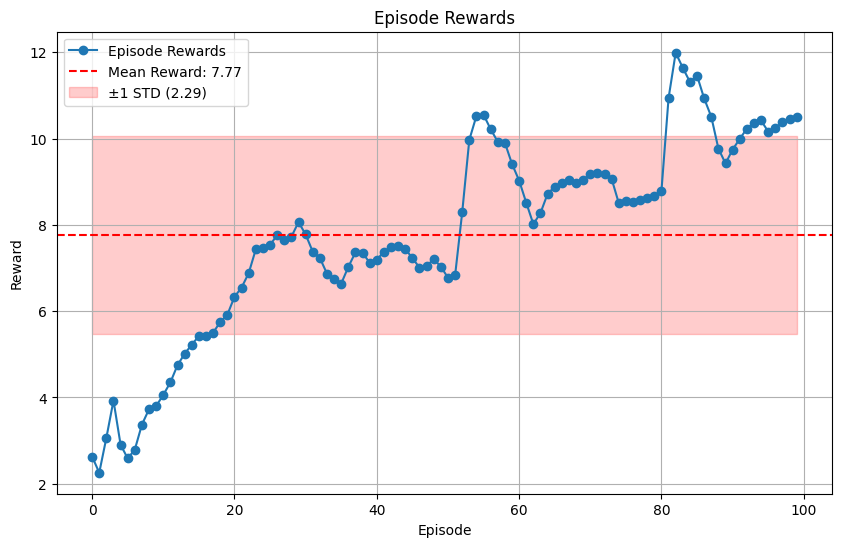

In [46]:
import matplotlib.pyplot as plt

# Plot individual episode rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards_results, marker='o', linestyle='-', label="Episode Rewards")
plt.axhline(mean_reward_results, color='red', linestyle='--', label=f"Mean Reward: {mean_reward_results:.2f}")
plt.fill_between(range(len(rewards_results)), mean_reward_results - std_reward_results, mean_reward_results + std_reward_results, 
                 color='red', alpha=0.2, label=f"±1 STD ({std_reward_results:.2f})")

plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()


### Experiments

In order to test the model with various datasets, you need to modify the environment and the MOPP calling function. Here we provide the instructions in order to test the model with Half Cheetah and Walker2D.

In [ ]:
''' 
# Walker2D random 
env_dataset = Environment(env_name="walker2d-random-v2", normalization_states=False, normalization_rewards=False)
mopp_policy = MOPP(
    env_dataset=env_dataset,
    q_networks=q_networks,  # Unused in this implementation
    behavior_ensemble=behavior_ensemble,
    dynamics_ensemble=dynamics_ensemble,
    horizon=3,
    gamma=0.99,
    beta=0,
    kappa=0.3,
    Nm=20,
    L=8,
    num_trajectories = 100,
    device=device,
    batch_size=256
)
'''

''' 
# Half Cheetah random 
env_dataset = Environment(env_name="halfcheetah-random-v2", normalization_states=False, normalization_rewards=False)
mopp_policy = MOPP(
    env_dataset=env_dataset,
    q_networks=q_networks,  # Unused in this implementation
    behavior_ensemble=behavior_ensemble,
    dynamics_ensemble=dynamics_ensemble,
    horizon=3,
    gamma=0.99,
    beta=0,
    kappa=3,
    Nm=20,
    L=4,
    num_trajectories = 100,
    device=device,
    batch_size=256
)
'''

''' 
# Hopper random 
env_dataset = Environment(env_name="hopper-random-v2", normalization_states=False, normalization_rewards=False)
mopp_policy = MOPP(
    env_dataset=env_dataset,
    q_networks=q_networks,  # Unused in this implementation
    behavior_ensemble=behavior_ensemble,
    dynamics_ensemble=dynamics_ensemble,
    horizon=4,
    gamma=0.99,
    beta=0,
    kappa=10,
    Nm=20,
    L=0.5,
    num_trajectories = 100,
    device=device,
    batch_size=256
'''


''' 
# Walker2D medium 
env_dataset = Environment(env_name="walker2d-medium-v2", normalization_states=False, normalization_rewards=False)
mopp_policy = MOPP(
    env_dataset=env_dataset,
    q_networks=q_networks,  # Unused in this implementation
    behavior_ensemble=behavior_ensemble,
    dynamics_ensemble=dynamics_ensemble,
    horizon=2,
    gamma=0.99,
    beta=0,
    kappa=0.1,
    Nm=20,
    L=7,
    num_trajectories = 100,
    device=device,
    batch_size=256
)
''' 

''' 
# Half Cheetah medium 
env_dataset = Environment(env_name="halfcheetah-medium-v2", normalization_states=False, normalization_rewards=False)
mopp_policy = MOPP(
    env_dataset=env_dataset,
    q_networks=q_networks,  # Unused in this implementation
    behavior_ensemble=behavior_ensemble,
    dynamics_ensemble=dynamics_ensemble,
    horizon=2,
    gamma=0.99,
    beta=0,
    kappa=3,
    Nm=20,
    L=5,
    num_trajectories = 100,
    device=device,
    batch_size=256
)
'''
